In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

In [3]:
df = pd.read_csv("food_dataset.csv")
print(df.shape)



(31700, 16)


In [16]:
df.duplicated().sum()


np.int64(0)

In [14]:

suspicious_cols = [col for col in df.columns if 'is_suspicious' in col]
df.drop(columns=suspicious_cols, inplace=True, errors='ignore')

numeric_cols = df.select_dtypes('number').columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.to_csv("food_dataset_cleaned.csv", index=False)
print("Preprocessing complete. Cleaned dataset saved as 'food_dataset_cleaned.csv'.")
print("Cleaned Dataset shape:", df.shape)


Preprocessing complete. Cleaned dataset saved as 'food_dataset_cleaned.csv'.
Cleaned Dataset shape: (31387, 16)


In [7]:
new_num_cols=df[numeric_cols].isnull().sum().sum()
print(new_num_cols)

0


In [8]:
numeric_cols = df.select_dtypes(include='number').columns

zero_cols = []
for col in numeric_cols:
    if (df[col] == 0).any():  
        df[f'{col}_is_zero'] = (df[col] == 0)  
        zero_cols.append(f'{col}_is_zero')    

print("Columns with zero flags:", zero_cols)

num_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numeric columns:", list(num_cols))

zero_counts = (df[num_cols] == 0).sum()
print("\nZero counts in all numeric columns:\n")
print(zero_counts)

cols_with_zeros = zero_counts[zero_counts > 0].index.tolist()
print("\nColumns that contain zeros:", cols_with_zeros)


if zero_cols:
    print(df[zero_cols].head(20))
    print(df[zero_cols].columns, df[zero_cols].shape)  
else:
    print("No numeric columns with zeros found.")


Columns with zero flags: ['Protein_is_zero', 'Fat_is_zero', 'Carbs_is_zero', 'Sugar_is_zero', 'Fiber_is_zero', 'Sodium_is_zero', 'Cholesterol_is_zero', 'Glycemic_Index_is_zero']
Numeric columns: ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']

Zero counts in all numeric columns:

Calories             0
Protein             16
Fat                  9
Carbs             1019
Sugar             1011
Fiber             2479
Sodium             313
Cholesterol       3624
Glycemic_Index     982
Water_Content        0
Serving_Size         0
dtype: int64

Columns that contain zeros: ['Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index']
    Protein_is_zero  Fat_is_zero  Carbs_is_zero  Sugar_is_zero  Fiber_is_zero  \
0             False        False          False          False          False   
1             False        False          False          False          False   
2     

In [9]:

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nNumeric summary statistics:")
print(df.describe())


print("\nMissing values per column:")
print(df.isna().sum())
print("\nMissing values percentage per column:")
print((df.isna().sum()/len(df)*100).round(2))


Shape: (31387, 24)

Columns: ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free', 'Food_Name', 'Protein_is_zero', 'Fat_is_zero', 'Carbs_is_zero', 'Sugar_is_zero', 'Fiber_is_zero', 'Sodium_is_zero', 'Cholesterol_is_zero', 'Glycemic_Index_is_zero']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31387 entries, 0 to 31386
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Calories                31387 non-null  float64
 1   Protein                 31387 non-null  float64
 2   Fat                     31387 non-null  float64
 3   Carbs                   31387 non-null  float64
 4   Sugar                   31387 non-null  float64
 5   Fiber                   31387 non-null  float64
 6   Sodium                  31387 non-null  float64
 7   Cholester

In [10]:
numeric_cols = df.select_dtypes(include='number').columns
zero_cols = []
for col in numeric_cols:
    if (df[col] == 0).any():
        df[f'{col}_is_zero'] = (df[col] == 0)
        zero_cols.append(f'{col}_is_zero')

if zero_cols:
    print("\nColumns with zeros:", zero_cols)
    print("Zero counts per flagged column:")
    print("\nTotal number of values in zero_cols:", df[zero_cols].sum().sum())
    print(df[zero_cols].sum())



Columns with zeros: ['Protein_is_zero', 'Fat_is_zero', 'Carbs_is_zero', 'Sugar_is_zero', 'Fiber_is_zero', 'Sodium_is_zero', 'Cholesterol_is_zero', 'Glycemic_Index_is_zero']
Zero counts per flagged column:

Total number of values in zero_cols: 9453
Protein_is_zero             16
Fat_is_zero                  9
Carbs_is_zero             1019
Sugar_is_zero             1011
Fiber_is_zero             2479
Sodium_is_zero             313
Cholesterol_is_zero       3624
Glycemic_Index_is_zero     982
dtype: int64


In [11]:
print(num_cols)

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')


In [12]:
num_cols = df.select_dtypes(include='number').columns.drop('Serving_Size')


In [13]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print("Value counts:")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).round(2))



Column: Meal_Type
Value counts:
Meal_Type
snack        7923
breakfast    7874
dinner       7799
lunch        7791
Name: count, dtype: int64
Meal_Type
snack        0.25
breakfast    0.25
dinner       0.25
lunch        0.25
Name: proportion, dtype: float64

Column: Preparation_Method
Value counts:
Preparation_Method
baked      7970
raw        7868
grilled    7868
fried      7681
Name: count, dtype: int64
Preparation_Method
baked      0.25
raw        0.25
grilled    0.25
fried      0.24
Name: proportion, dtype: float64

Column: Food_Name
Value counts:
Food_Name
Pizza        5916
Burger       4938
Donut        4466
Pasta        3975
Sushi        3462
Ice Cream    2968
Steak        1992
Apple        1484
Banana       1193
Salad         993
Name: count, dtype: int64
Food_Name
Pizza        0.19
Burger       0.16
Donut        0.14
Pasta        0.13
Sushi        0.11
Ice Cream    0.09
Steak        0.06
Apple        0.05
Banana       0.04
Salad        0.03
Name: proportion, dtype: float64


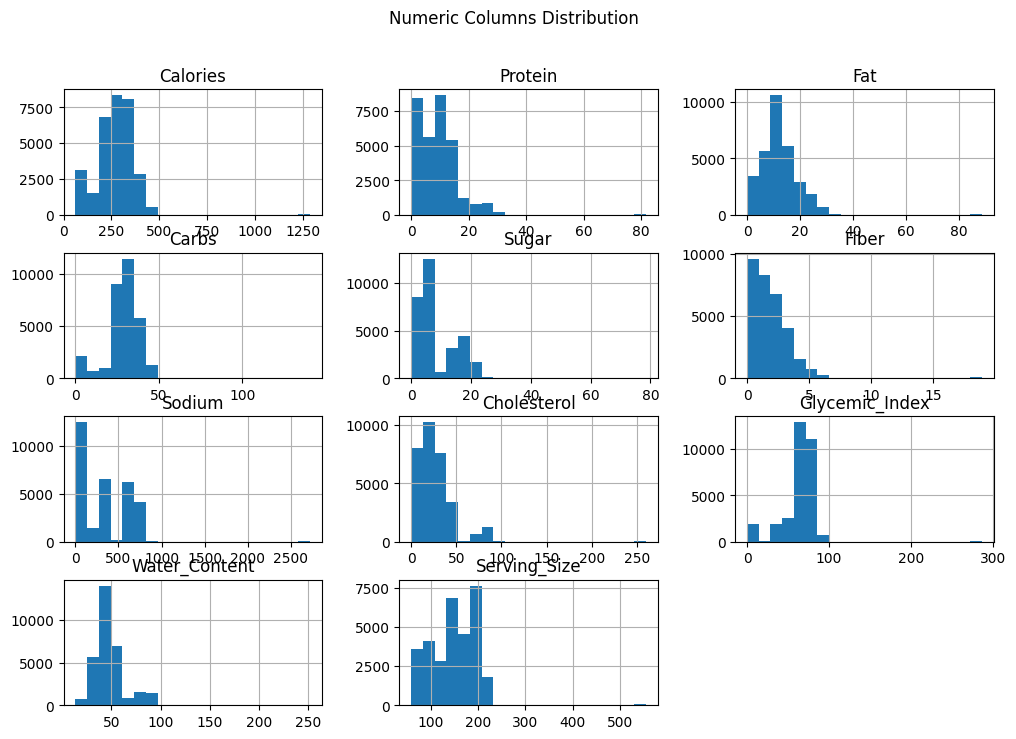

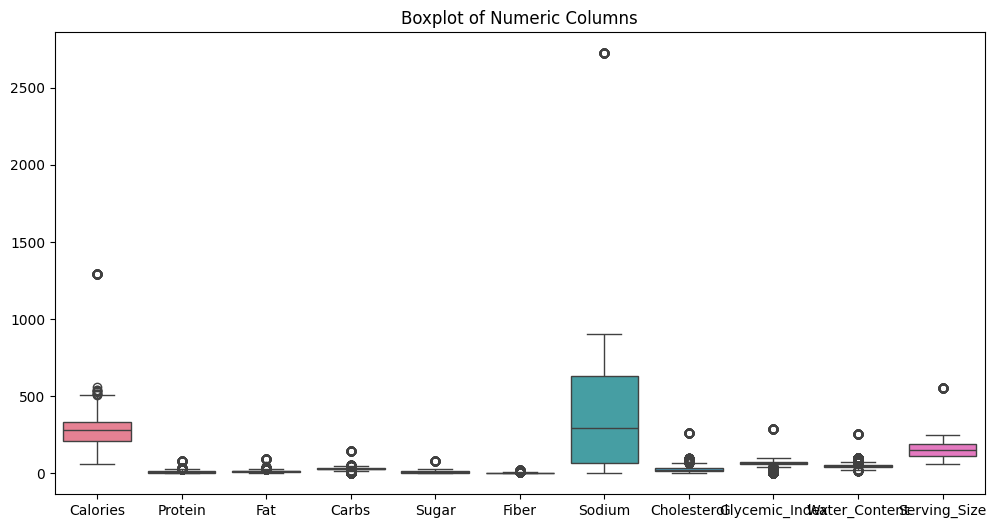

In [14]:

df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Numeric Columns Distribution")
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns")
plt.show()


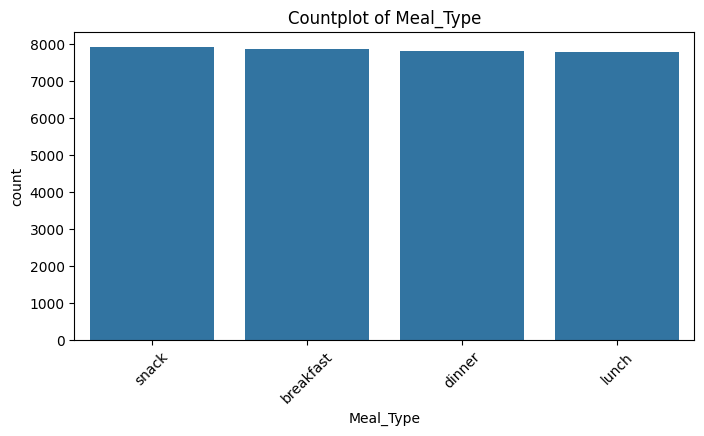

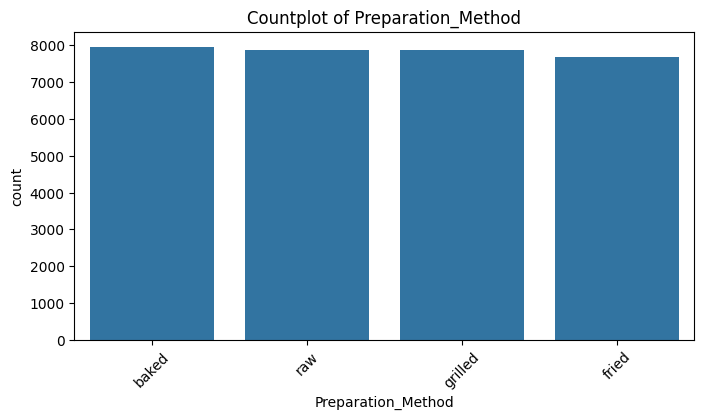

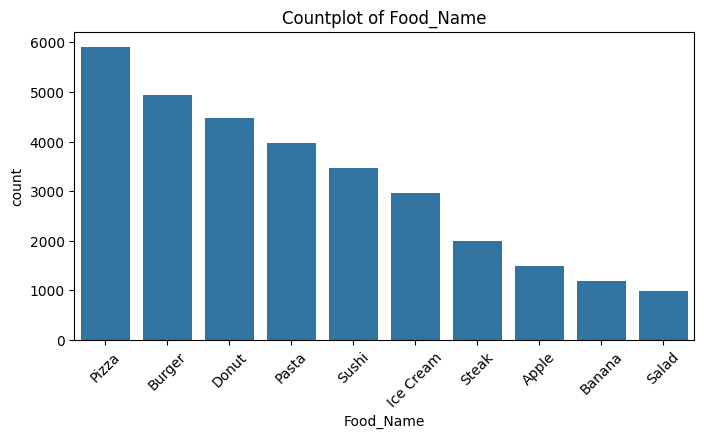

In [15]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()



Correlation matrix:
                Calories   Protein       Fat     Carbs     Sugar     Fiber  \
Calories        1.000000  0.784599  0.812552  0.286434 -0.115799  0.024337   
Protein         0.784599  1.000000  0.744491  0.011034 -0.257160  0.105743   
Fat             0.812552  0.744491  1.000000  0.069379  0.050183 -0.036257   
Carbs           0.286434  0.011034  0.069379  1.000000  0.300966  0.362623   
Sugar          -0.115799 -0.257160  0.050183  0.300966  1.000000  0.210186   
Fiber           0.024337  0.105743 -0.036257  0.362623  0.210186  1.000000   
Sodium          0.551628  0.532461  0.518013  0.388001  0.006293  0.232431   
Cholesterol     0.722288  0.810641  0.831394 -0.118343  0.075288 -0.067649   
Glycemic_Index  0.274426  0.036463  0.142924  0.826910  0.343215  0.313487   
Water_Content  -0.078999  0.160084 -0.014434 -0.009909  0.302884  0.640349   
Serving_Size    0.621671  0.777991  0.464282  0.184511 -0.301429  0.302720   

                  Sodium  Cholesterol  Gly

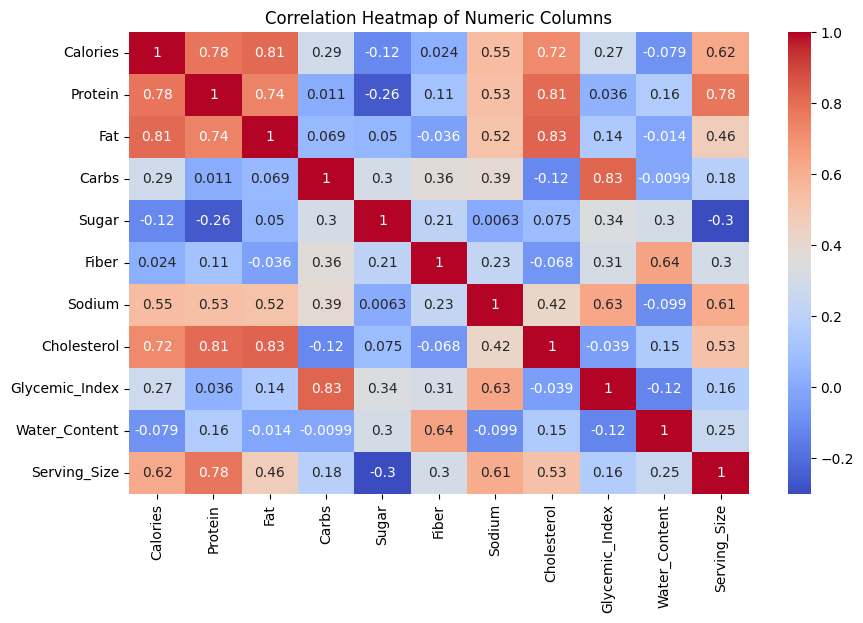

In [16]:
corr = df[numeric_cols].corr()
print("\nCorrelation matrix:")
print(corr)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [17]:
print("\nEDA Complete.")



EDA Complete.
